In [2]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-py3-none-any.whl size=8606 sha256=a124ed09cd4ec4cbd8add67087906dbff2e484759e72315c5ffb65ca145ffc8c
  Stored in directory: c:\users\samee\appdata\local\pip\cache\wheels\b9\32\90\b7e7953eeb50b9880bd01bcdbf832bf9550a54d834996f858c
Successfully built minisom


In [87]:
from numpy import genfromtxt,array,linalg,zeros,apply_along_axis

# reading the iris dataset in the csv format    
# (downloaded from http://aima.cs.berkeley.edu/data/iris.csv)
data = genfromtxt('iris.csv', delimiter=',',usecols=(0,1,2,3))
# normalization to unity of each pattern in the data
data = apply_along_axis(lambda x: x/linalg.norm(x),1,data)

In [116]:

from minisom import MiniSom
### Initialization and training ###
som = MiniSom(7,7,data.shape[1],sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data,100) # training with 100 iterations
print("\n...ready!")

Training...

...ready!


In [117]:
from pylab import plot,axis,show,pcolor,colorbar,bone
# loading the labels
target = genfromtxt('iris.csv',
                    delimiter=',',usecols=(4),dtype=str)
t = zeros(len(target),dtype=int)
# use different colors and markers for each label
markers = ['o','s','D']
colors = ['r','g','b']

In [118]:
t[target == '1'] = 0
#setosa
t[target == '2'] = 1
#versicolor
t[target == '3'] = 2
#virginica

In [119]:
print(t)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


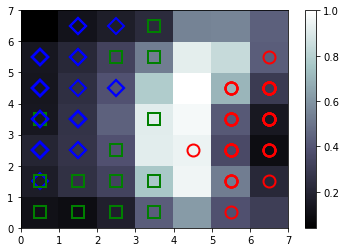

In [115]:
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()

for cnt,xx in enumerate(data):
 w = som.winner(xx) # getting the winner
 # palce a marker on the winning position for the sample xx
 plot(w[0]+.5,w[1]+.5,markers[t[cnt]],markerfacecolor='None',
   markeredgecolor=colors[t[cnt]],markersize=12,markeredgewidth=2)
axis([0,som._weights.shape[0],0,som._weights.shape[1]])
show() # show the figure